***Exercise 3-1***

In [26]:
# Copied the import cell from the books code
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import thinkstats2
import thinkplot

In [2]:
# Copied funtion from the books code

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [5]:
# Pulled out the numkdhh column from the respondent variable and created a pandas series with the data.
resp = nsfg.ReadFemResp()
num_kids = resp['numkdhh']
type(num_kids)

pandas.core.series.Series

In [6]:
# convert num_kids series into a pmf object
num_kids_pmf = thinkstats2.Pmf(num_kids, label='actual')
num_kids_pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'actual')

In [11]:
# Use the BiasPmf function to compute the bias distribution
BiasPmf(num_kids_pmf, label='observed')

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166}, 'observed')

Note that the values change largely because households with zero kids, don't have anyone to observe that there are no kids and households with many kids have increasing observations.

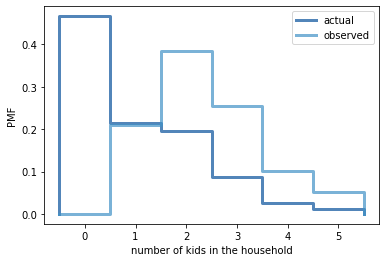

<Figure size 576x432 with 0 Axes>

In [12]:
# plot both the normalized pmf and the observed pmf 
biased_pmf = BiasPmf(num_kids_pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([num_kids_pmf, biased_pmf])
thinkplot.Show(xlabel='number of kids in the household', ylabel='PMF')

In [14]:
# Print the means for each of the pmfs
print('Mean for actual pmf: ', num_kids_pmf.Mean())
print('Mean for observed pmf: ', biased_pmf.Mean())

Mean for actual pmf:  1.024205155043831
Mean for observed pmf:  2.403679100664282


***Exercise 3-2***

In [38]:
# Create my own function to calculate mean of a pmf

def PmfMean(pmf): 
    count = 0
    total = 0
    for x, prob in pmf.d.items():
        count = count =+ 1
        total = total =+ prob
    return total / count
   
 

In [39]:
PmfMean(num_kids_pmf)

0.01072877142483318

In [3]:
# Something went really wrong there, this function is adding all the values and then dividing by the entire number 
# of values. I actually need to figure out the mean for each key:value pair in my pmf, then calculate the mean of the means.
# Gonna have to rework the function.

def PmfMean(pmf):
    mean = 0.0
    for x, p in pmf.d.items():
        mean += p * x
    return mean


In [7]:
# Run the function to show the mean number of kids and it matches the mean calculated at the end of the last exercise.
PmfMean(num_kids_pmf)

1.024205155043831

In [16]:
# Create my own function to calculate var of a pmf, use the above function as a base and work from there

def PmfVar(pmf):
    var = 0
    mean = 0
    for x, p in pmf.d.items():
        mean += p * x
        var += p * (x - mean)**2
        return var

In [17]:
# Run the function to show the variance of the pmf number of kids
PmfVar(num_kids_pmf)

0.0

In [18]:
# Okay, so that didn't work. Let's try using the .Mean method this time.

def PmfVar(pmf):
    var = 0
    for x, p in pmf.d.items():
        var += p * (x - pmf.Mean())**2
        return var

In [19]:
PmfVar(num_kids_pmf)

0.4890191625330641

In [21]:
# Now check my result using the .Var method 
num_kids_pmf.Var()

1.4128643263531195

In [23]:
# Not really sure why that didn't work, maybe it's because the zero values. I had to look at the solution to get this
# to work. The solution says that mu is the point that the variance is built around and if it is none that it will use 
# pmf.Mean(). So why can't you just put pmf.Mean() into the function and skip that whole part?

def PmfVar(pmf, mu=None):
    
    if mu is None:
        mu = pmf.Mean()

    var = 0.0
    for x, p in pmf.d.items():
        var += p * (x - mu) ** 2
    return var

In [24]:
PmfVar(num_kids_pmf)

1.4128643263531195

***Exercise 4-1***

In [33]:
# Copied code from book exercises to get started
import first
live, firsts, others = first.MakeFrames()

def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [29]:
# Pull out the values for live total weight and view total number of records and total number of records without na's
live_wgt = live.totalwgt_lb
live_wgt_dropna = live_wgt.dropna()
print('All live births: ', len(live_wgt), len(live_wgt_dropna))


All live births:  9148 9038


In [30]:
# Convert the data that doesn't have the na's into a pmf
live_pmf = thinkstats2.Pmf(live_wgt_dropna, label='live')

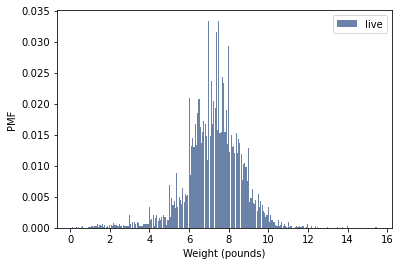

In [32]:
# Plot the pmf and view the distribution
thinkplot.PrePlot()
thinkplot.Hist(live_pmf)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

In [34]:
# Use PercentileRank function to calculate my percentile rank in all live births data set.
# My birth weight was 6lbs 6oz, which calculates to 6.375lbs.

PercentileRank(live_pmf, 6.375)

48.91304347826087

In [35]:
# So i weighed more than 48.9% of all live babies.
# Now to see where I fall using the 'others' pmf, but first, I have to create it. I'll just copy/paste my code from
# above and change live to others.

others_wgt = others.totalwgt_lb
others_wgt_dropna = others_wgt.dropna()
print('Other births: ', len(others_wgt), len(others_wgt_dropna))
others_pmf = thinkstats2.Pmf(others_wgt_dropna, label='others')

Other births:  4735 4675


In [36]:
# Calling the PercentileRank function on other births using my birth weight to compare
PercentileRank(others_pmf, 6.375)

48.466257668711656

In [ ]:
# So I went down a notch. Guess other babies tend to weigh a little more than first babies.

***Exercise 4-2***

In [38]:
# First i have to import random
import random

In [40]:
# Generate a list that has 1000 random points between zero and one
dat = [random.random() for x in range (0, 1000)]

In [54]:
# Check and make sure that worked
len(dat)

1000

In [58]:
# Now i'm going to covert this list into a pmf object
dat_pmf = thinkstats2.Pmf(dat)
dat_pmf

Pmf({0.6445077482231953: 0.001, 0.9698608645906447: 0.001, 0.11234541032894396: 0.001, 0.5966690074437724: 0.001, 0.13149710852070728: 0.001, 0.8881417110262885: 0.001, 0.24015270014899348: 0.001, 0.18920144259242955: 0.001, 0.16834707846702568: 0.001, 0.9135483059696445: 0.001, 0.8255788472166552: 0.001, 0.3030039061252642: 0.001, 0.0936349709627623: 0.001, 0.04667866894198269: 0.001, 0.15574375629983972: 0.001, 0.7792319969077182: 0.001, 0.9385393609525495: 0.001, 0.044811314440716066: 0.001, 0.719149970176223: 0.001, 0.519929886935606: 0.001, 0.543094382396518: 0.001, 0.7383350232666709: 0.001, 0.9032234426452642: 0.001, 0.05724523470654497: 0.001, 0.7954790662775152: 0.001, 0.24785064622328323: 0.001, 0.5084299495908677: 0.001, 0.011579298276573446: 0.001, 0.8657096830801665: 0.001, 0.9383499276704987: 0.001, 0.5059406814381614: 0.001, 0.6496148392949854: 0.001, 0.48280059459241886: 0.001, 0.13143634000431315: 0.001, 0.10369592370228653: 0.001, 0.8978386082908228: 0.001, 0.24457910

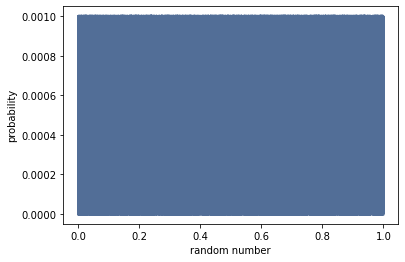

In [65]:
# Plot the pmf
thinkplot.Pmf(dat_pmf)
thinkplot.Config(xlabel='random number', ylabel="probability")

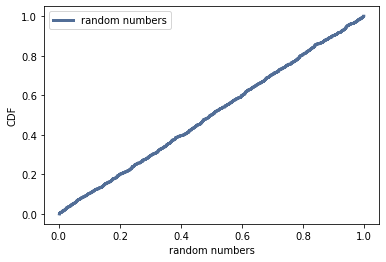

In [74]:
# Since all the numbers are random, they each have the same probability of 0.0010. The pmf plot is not very valuable
# with this object, so let's continue. Now, i'm going to plot the Cdf for the original list of random numbers

cdf = thinkstats2.Cdf(dat, label='random numbers')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='random numbers', ylabel='CDF')

In [ ]:
# The CDF plot above is a straight line which indicates the distribution is uniform.